In [371]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn import tree
 


Qualité Modèle

In [357]:
class Qualite:
    def __init__(self, 
                   _modele=gnb, 
                   _data=sous_ensemble, 
                   _y=cible, 
                   _y_pred=y_pred_NBS,
                   _y_pred_proba=y_pred_NBS_proba,
                   _cv=10,
                   _print_mode=True):
        self.accuracy = sklearn.metrics.accuracy_score(_y, _y_pred)
        
        self.AUC = sklearn.metrics.roc_auc_score(_y, _y_pred)
        
        self.cross_validation = cross_val_score(_modele, _data, y=_y, cv=_cv)
        self.moyenne = np.mean(self.cross_validation)
        self.ecart_type = np.std(self.cross_validation)
        
        self.roc = ROC_curves(pred=_y_pred_proba, res=_y)
        
        self.precision = average_precision_score(_y, _y_pred)
        
        if _print_mode:
            self.roc.plot_it()

ROC

In [358]:
def TP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] > theta and x == 1:
            count += 1
        i += 1
    return count

def FP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] >= theta and x == 0:
            count += 1
        i += 1
    return count

def TN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 0:
            count += 1
        i += 1
    return count

def FN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 1:
            count += 1
        i += 1
    return count



class ROC_curves:
    def __init__(self, pred = y_pred, res = cible, gran = 101):
        x = []
        y = []
        for j in range(0,gran):
            tn = TN(j/(gran-1),pred,res)
            neg = tn + FP(j/(gran-1),pred,res)
            tp = TP(j/(gran-1),pred,res)
            pos = tp + FN(j/(gran-1),pred,res)

            if neg == 0:
                x.append(0)
            else:
                x.append(tn / neg)
            if pos == 0:
                y.append(0)
            else:
                y.append(tp / pos)
      
        self.rocx = x
        self.rocy = y
    def plot_it(self):
        plt.plot(self.rocx,self.rocy)
        plt.show()

In [359]:
path = 'credit.data'
data = pd.read_csv(path, delimiter='	',header=None, na_values='?')
##data = pd.DataFrame(data)
data = data.dropna(axis=0, how='any')

In [360]:
cible = data[15]##.values.reshape(-1,1)
###cible  = pd.DataFrame(data=cible)
cible = cible.replace(to_replace='+', value=1)
cible = cible.replace(to_replace='-', value=0)

In [361]:
cible.shape

(653,)

In [362]:
data = data.drop(15, axis=1)

In [363]:
sous_ensemble = data[[1,2,7,13,14]]
sous_ensemble = sous_ensemble.astype(float)

NaiveBayesSimple

In [364]:
gnb = GaussianNB()
y_pred_NBS_proba = gnb.fit(sous_ensemble, cible).predict_proba(sous_ensemble)
y_pred_NBS = gnb.fit(sous_ensemble, cible).predict(sous_ensemble)

Qualité Modèle

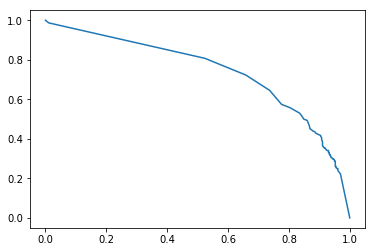

In [376]:
accuracy_NBS = sklearn.metrics.accuracy_score(cible, y_pred_NBS)
AUC_NBS = sklearn.metrics.roc_auc_score(cible, y_pred_NBS)

cross_validation_NBS_10= cross_val_score(gnb, sous_ensemble, y=cible, cv=10) 

ROC = ROC_curves(pred=y_pred_NBS_proba, res=cible)
ROC.plot_it()

In [377]:
cross_validation_NBS_10

array([ 0.56060606,  0.63636364,  0.68181818,  0.65151515,  0.68181818,
        0.66666667,  0.66153846,  0.609375  ,  0.6875    ,  0.71875   ])

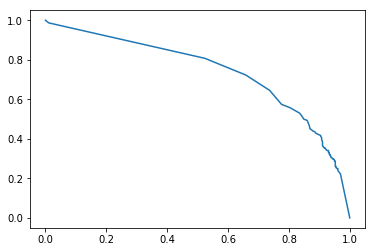

0.042526906347811158

In [378]:
q_NBS = Qualite()
q_NBS.ecart_type

Arbre CART

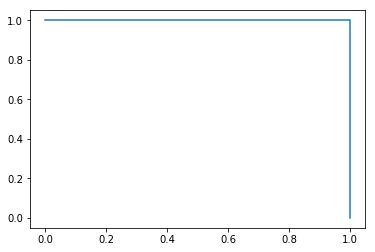

In [384]:
clf = tree.DecisionTreeClassifier()
y_pred_CART_proba = clf.fit(sous_ensemble, cible).predict_proba(sous_ensemble)
y_pred_CART = clf.fit(sous_ensemble, cible).predict(sous_ensemble)
q_CART = Qualite(_modele=clf,
                 _data=sous_ensemble,
                 _y=cible,
                 _y_pred=y_pred_CART,
                 _y_pred_proba=y_pred_CART_proba)

In [385]:
q_CART.cross_validation

array([ 0.59090909,  0.68181818,  0.66666667,  0.63636364,  0.63636364,
        0.6969697 ,  0.63076923,  0.71875   ,  0.640625  ,  0.734375  ])